<a href="https://colab.research.google.com/github/BrennZA/Introduction-to-DS-w-Python/blob/main/tv-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import advertising CSV file

df_adv = pd.read_csv('/content/drive/MyDrive/intro-data-science/csv-files/Advertising.csv')
df_adv.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


Text(0, 0.5, 'Sales')

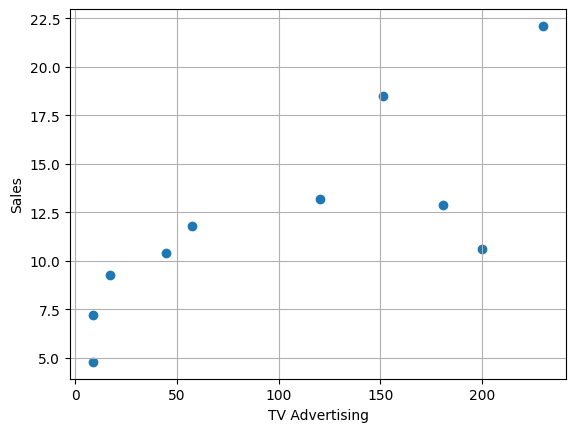

In [3]:
x = df_adv.TV.iloc[:10]
y = df_adv.sales.iloc[:10]

plt.scatter(x, y)
plt.grid(visible=True)
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
# Add grid to plot

In [4]:
y.mean()

12.08

In [30]:
# Get subset of data with TV as predictor
x_true = df_adv.TV.iloc[5:13]
x_true

87.425

In [27]:
# Use Sales column as response value
y_true = df_adv.sales.iloc[5:13]
y_true

10.35

In [7]:
# Sort data to get indices ordered lowest to highest of TV values
idx = np.argsort(x_true).values
idx

array([3, 0, 7, 1, 5, 2, 4, 6])

In [28]:
# Get predictor data in order given by idx above
x_true = x_true.iloc[idx].values
x_true

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [9]:
# Get response data in order given by idx above
y_true = y_true.iloc[idx].values
y_true

array([ 4.8,  7.2,  9.2, 11.8,  8.6, 13.2, 10.6, 17.4])

In [10]:
# Find index of the nearest neighbour & returns the value
def find_nearest(array, value):

  # Hint: To find idx, use .idxmin() function on the series
  idx = pd.Series(np.abs(array-value)).idxmin()

  return idx, array[idx]

In [11]:
# Create synthetic x-values
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))

x, y

(array([  8.6       ,  12.80612245,  17.0122449 ,  21.21836735,
         25.4244898 ,  29.63061224,  33.83673469,  38.04285714,
         42.24897959,  46.45510204,  50.66122449,  54.86734694,
         59.07346939,  63.27959184,  67.48571429,  71.69183673,
         75.89795918,  80.10408163,  84.31020408,  88.51632653,
         92.72244898,  96.92857143, 101.13469388, 105.34081633,
        109.54693878, 113.75306122, 117.95918367, 122.16530612,
        126.37142857, 130.57755102, 134.78367347, 138.98979592,
        143.19591837, 147.40204082, 151.60816327, 155.81428571,
        160.02040816, 164.22653061, 168.43265306, 172.63877551,
        176.84489796, 181.05102041, 185.25714286, 189.46326531,
        193.66938776, 197.8755102 , 202.08163265, 206.2877551 ,
        210.49387755, 214.7       ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.

In [12]:
# Apply KNN algorithm to predict the y-value for the given x-value
for i, xi in enumerate(x):

  # Get the sales values closest to the given x value
  y[i] = y_true[find_nearest(x_true, xi)[0]]

In [13]:
x, y

(array([  8.6       ,  12.80612245,  17.0122449 ,  21.21836735,
         25.4244898 ,  29.63061224,  33.83673469,  38.04285714,
         42.24897959,  46.45510204,  50.66122449,  54.86734694,
         59.07346939,  63.27959184,  67.48571429,  71.69183673,
         75.89795918,  80.10408163,  84.31020408,  88.51632653,
         92.72244898,  96.92857143, 101.13469388, 105.34081633,
        109.54693878, 113.75306122, 117.95918367, 122.16530612,
        126.37142857, 130.57755102, 134.78367347, 138.98979592,
        143.19591837, 147.40204082, 151.60816327, 155.81428571,
        160.02040816, 164.22653061, 168.43265306, 172.63877551,
        176.84489796, 181.05102041, 185.25714286, 189.46326531,
        193.66938776, 197.8755102 , 202.08163265, 206.2877551 ,
        210.49387755, 214.7       ]),
 array([ 4.8,  7.2,  9.2,  9.2,  9.2,  9.2,  9.2,  9.2, 11.8, 11.8, 11.8,
        11.8, 11.8,  8.6,  8.6,  8.6,  8.6,  8.6,  8.6,  8.6,  8.6, 13.2,
        13.2, 13.2, 13.2, 13.2, 13.2, 13.2, 13

In [14]:
x_true, y_true

(array([  8.6,   8.7,  23.8,  57.5,  66.1, 120.2, 199.8, 214.7]),
 array([ 4.8,  7.2,  9.2, 11.8,  8.6, 13.2, 10.6, 17.4]))

Text(0, 0.5, 'Sales in $1000')

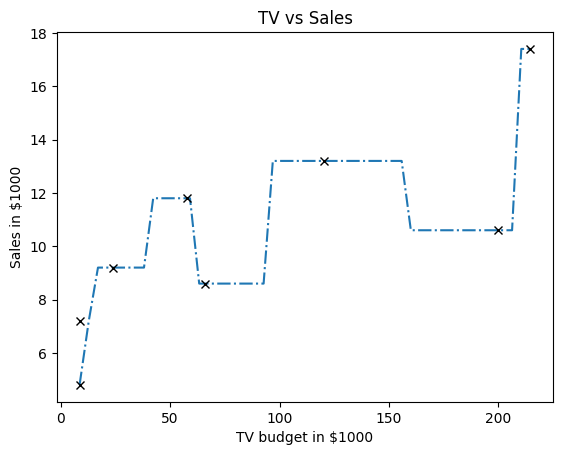

In [15]:
# Plot the sinthetic data along with the predictions
plt.plot(x, y, '-.')

plt.plot(x_true, y_true, 'kx');

plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

In [16]:
# Read the data from the file 'Advertising.csv'
df = pd.read_csv('/content/drive/MyDrive/intro-data-science/csv-files/Advertising.csv')

# Set 'TV' as the predictor variable 'x'
x = df[['TV']]

# Set 'Sales'as the response variable 'y'
y = df['sales']

In [17]:
# Split dataset as 60% training & 40% test with random state = 42
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, train_size=0.60, random_state=66)

In [18]:
x_train.shape[0]

120

In [19]:
int(np.sqrt(120))

10

In [20]:
# Choose the minimum & maximum k values between 1 - 70
k_value_min = 1
k_value_max = 70

# Create a list of integer k values between k_value_min & k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70, dtype=int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


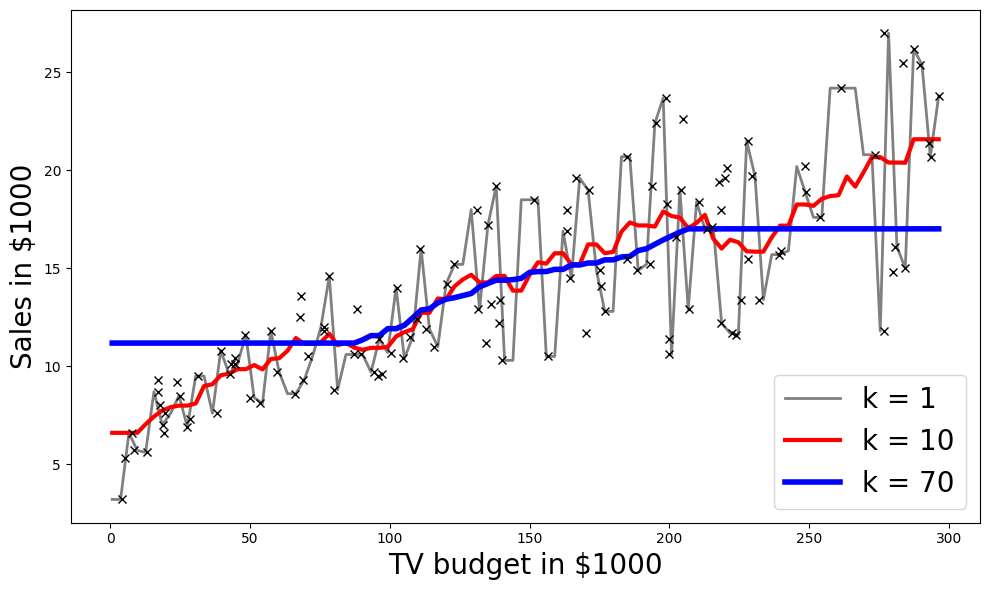

In [21]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k}
knn_dict = {}

# Variable used to alter the linewidth of each plot
j = 0

# Loop over all the k values
for k_value in k_list:

  # Creating a kNN Regression model
  model = KNeighborsRegressor(n_neighbors=k_value)

  # Fitting the regression model on the training data
  model.fit(x_train, y_train)

  # Use the trained model to predict on the test data
  y_pred = model.predict(x_test)

  # Calculate the MSE of the test data predictions
  MSE = mean_squared_error(y_test, y_pred, squared=True)

  # Store the MSE values of each k value in the dictionary
  knn_dict[k_value] = MSE

  # Helper code to plot the data along with the model predictions
  colors = ['grey', 'r', 'b']
  if k_value in [1, 10, 70]:
    xvals = np.linspace(x.min(), x.max(), 100)
    ypreds = model.predict(xvals)
    ax.plot(xvals, ypreds, '-', label = f'k = {int(k_value)}', linewidth=j+2, color = colors[j])
    j+=1

ax.legend(loc='lower right', fontsize=20)
ax.plot(x_train, y_train, 'x', label='train', color='k')
# ax.plot(x_test, y_test, 'x', label='train', color='k')
ax.set_xlabel('TV budget in $1000', fontsize=20)
ax.set_ylabel('Sales in $1000', fontsize=20)
plt.tight_layout();

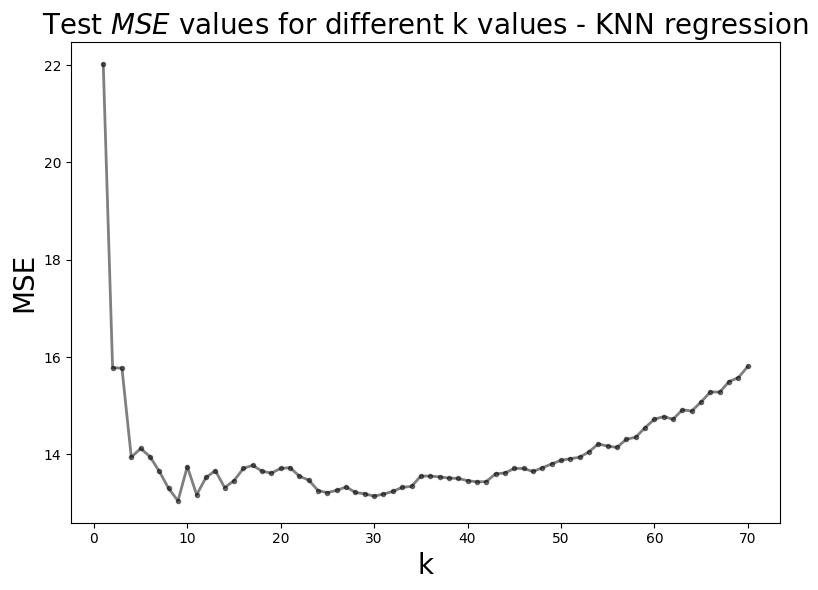

In [22]:
# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(), knn_dict.values(),'k.-', alpha=0.5, linewidth=2)

# Set the title and axis labels
plt.xlabel('k', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.title('Test $MSE$ values for different k values - KNN regression', fontsize=20)
plt.tight_layout()

In [23]:
# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key for (key, value) in knn_dict.items() if value == min_mse]
knn_dict.items()

# Print the best k-value
print('The best k value is ', best_model, 'with an MSE of ', min_mse)

The best k value is  [9] with an MSE of  13.046766975308643


In [25]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
# print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")


In [ ]:
# Looking for average results score of each subject - getting errors when using groupby() related to series object
### Depending on the function used returns can be a dataframe, series / numpy array
### Every column in DataFrame are a series
### Don't select column then groupby()
### groupby() first then mean() after

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


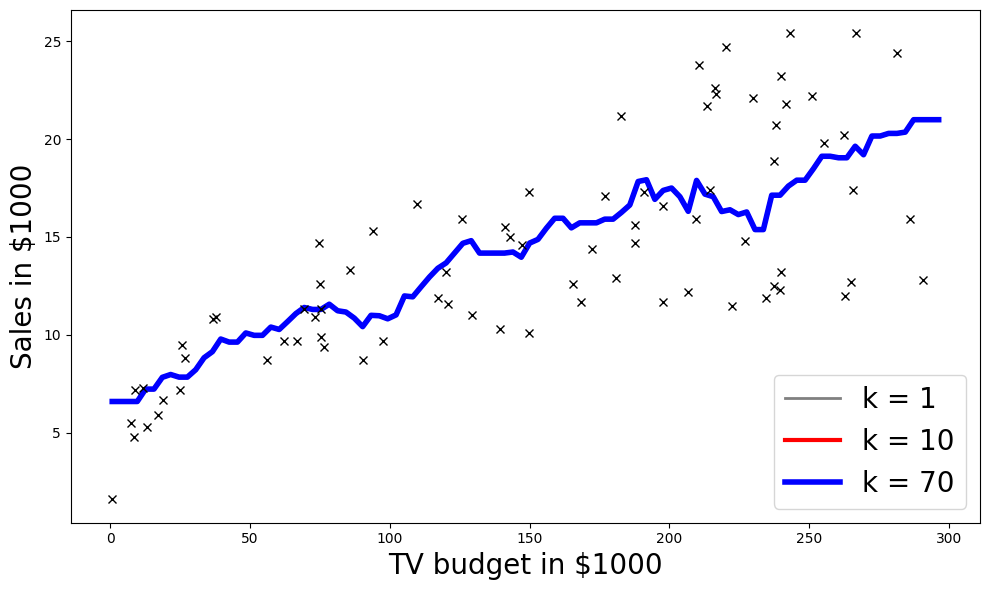

In [31]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k}
knn_dict = {}

# Variable used to alter the linewidth of each plot
j = 0

# Loop over all the k values
for k_value in k_list:

  # Creating a kNN Regression model
  model = KNeighborsRegressor(n_neighbors=9)

  # Fitting the regression model on the training data
  model.fit(x_train, y_train)

  # Use the trained model to predict on the test data
  y_pred = model.predict(x_test)

  # Calculate the MSE of the test data predictions
  MSE = mean_squared_error(y_test, y_pred, squared=True)

  # Store the MSE values of each k value in the dictionary
  knn_dict[k_value] = MSE

  # Helper code to plot the data along with the model predictions
  colors = ['grey', 'r', 'b']
  if k_value in [1, 10, 70]:
    xvals = np.linspace(x.min(), x.max(), 100)
    ypreds = model.predict(xvals)
    ax.plot(xvals, ypreds, '-', label = f'k = {int(k_value)}', linewidth=j+2, color = colors[j])
    j+=1

ax.legend(loc='lower right', fontsize=20)
# ax.plot(x_train, y_train, 'x', label='train', color='k')
ax.plot(x_test, y_test, 'x', label='train', color='k')
ax.set_xlabel('TV budget in $1000', fontsize=20)
ax.set_ylabel('Sales in $1000', fontsize=20)
plt.tight_layout();
